In [41]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ISLR)
library(GGally)
options(repr.matrix.max.rows = 6)

In [45]:
#Loading the Dataset
url <- "https://raw.githubusercontent.com/Zitong06/data/refs/heads/main/players.csv"
players_original <- read_csv(url)
players_na.rm <- na.omit(players_original)
players_fac <- players_na.rm |>
        mutate(experience = factor(experience),
        gender = factor(gender))
players_fac

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


In [46]:
players <- players_fac|>
    select(played_hours, experience, subscribe, Age) |>
    as_tibble()
players

played_hours,experience,subscribe,Age
<dbl>,<fct>,<lgl>,<dbl>
30.3,Pro,TRUE,9
3.8,Veteran,TRUE,17
0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮
0.3,Veteran,FALSE,22
0.0,Amateur,FALSE,17
2.3,Amateur,FALSE,17


In [51]:
players_split <- initial_split(players, prop = 0.7, strata = played_hours)
players_training <- training(players_split)
players_test <- testing(players_split)

In [53]:
set.seed(2020) #DO NOT REMOVE
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

players_recipe <- recipe(played_hours ~ experience + subscribe + Age, data=players_training)


print(lm_spec)
print(players_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 





── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



In [54]:
set.seed(2020) 
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data=players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
       (Intercept)  experienceBeginner       experiencePro   experienceRegular  
            2.6922             -3.3130             -1.9339             15.0406  
 experienceVeteran       subscribeTRUE                 Age  
           -3.9553              6.5908             -0.1486  


In [57]:
lm_test_results <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.37257810
rsq,standard,0.03861771
mae,standard,13.42394682


In [98]:
set.seed(2020)

lm_rmse <- players_fit |>
        predict(new_data=players_training) |>
         bind_cols(players_training) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmse

[1] 24.5093

ERROR: Error in eval(expr, envir, enclos): object 'played_hours' not found


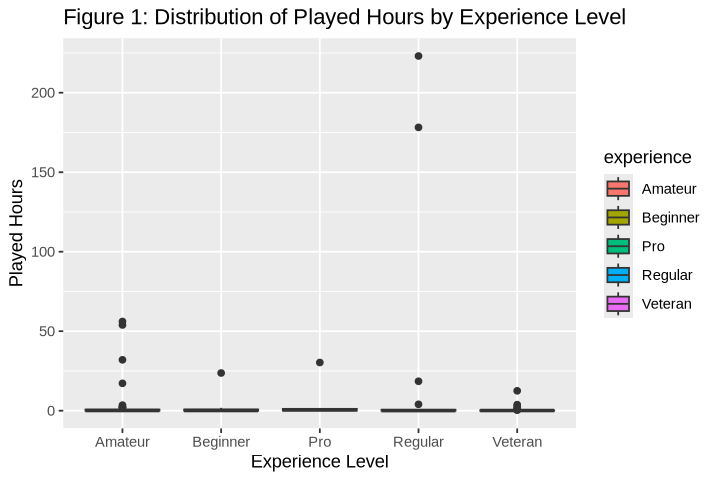

In [89]:
options(repr.plot.width = 6, repr.plot.height = 4)
experience_plot <- players_training|>
ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(x = "Experience Level", y = "Played Hours") +
  ggtitle("Figure 1: Distribution of Played Hours by Experience Level")
experience_plot

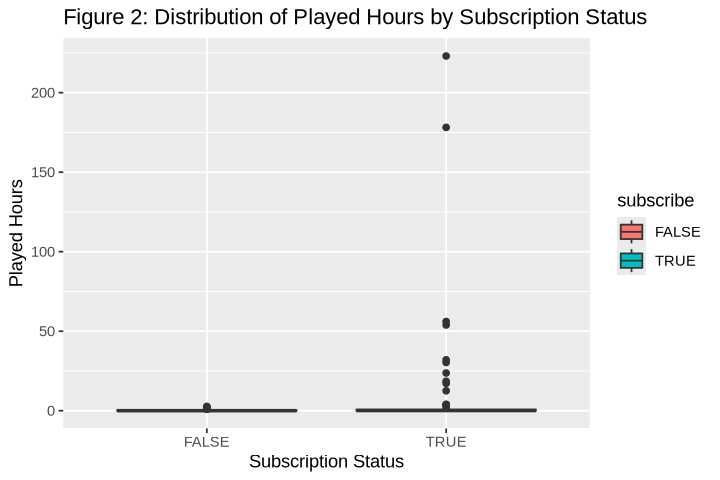

In [97]:
options(repr.plot.width = 6, repr.plot.height = 4)
subscription_status_plot <- players_training|>
ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(x = "Subscription Status", y = "Played Hours") +
  ggtitle("Figure 2: Distribution of Played Hours by Subscription Status")
subscription_status_plot

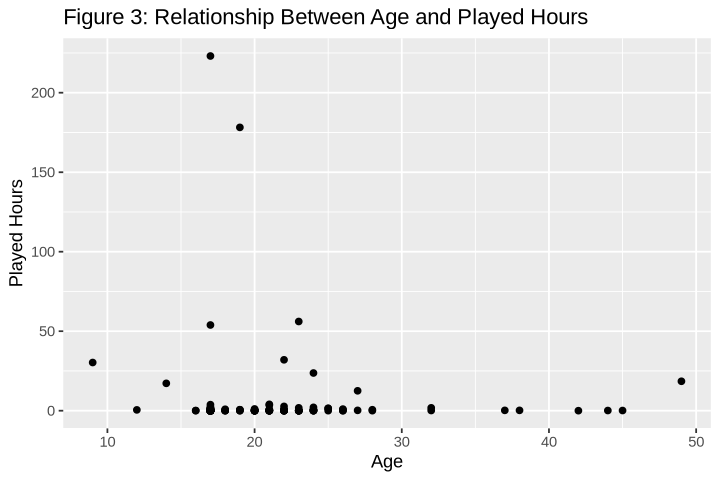

In [92]:
Age_plot <- players_training |>
ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(x = "Age", y = "Played Hours") +
  ggtitle("Figure 3: Relationship Between Age and Played Hours")

.pred,played_hours,experience,subscribe,Age
<dbl>,<dbl>,<fct>,<lgl>,<dbl>
6.012036,30.3,Pro,TRUE,9
2.802095,3.8,Veteran,TRUE,17
-3.788658,0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮,⋮
-4.5314412,0.3,Veteran,FALSE,22
0.1666888,0.0,Amateur,FALSE,17
0.1666888,2.3,Amateur,FALSE,17


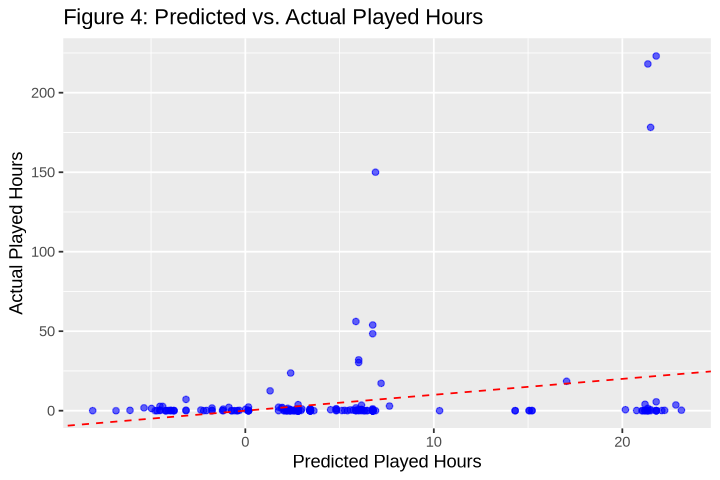

In [95]:
predicted_values <- players_fit |>
  predict(players) |>
  bind_cols(players) 
predicted_values

predicted_vs_actual_plot <- ggplot(predicted_values, aes(x = .pred, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Predicted Played Hours", y = "Actual Played Hours") +
  ggtitle("Figure 4: Predicted vs. Actual Played Hours") 
predicted_vs_actual_plot